<a href="https://www.kaggle.com/code/basia25/neural-network-from-scratch?scriptVersionId=231806536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Deep Learning Fundamentals Lab 3 -- Neural Network From Scratch

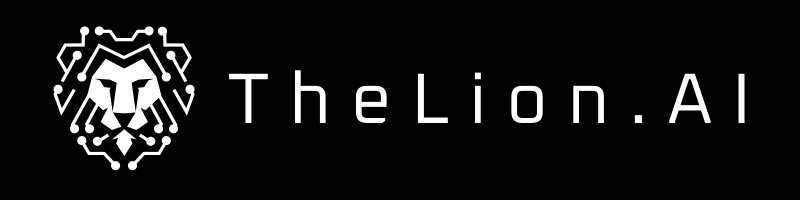
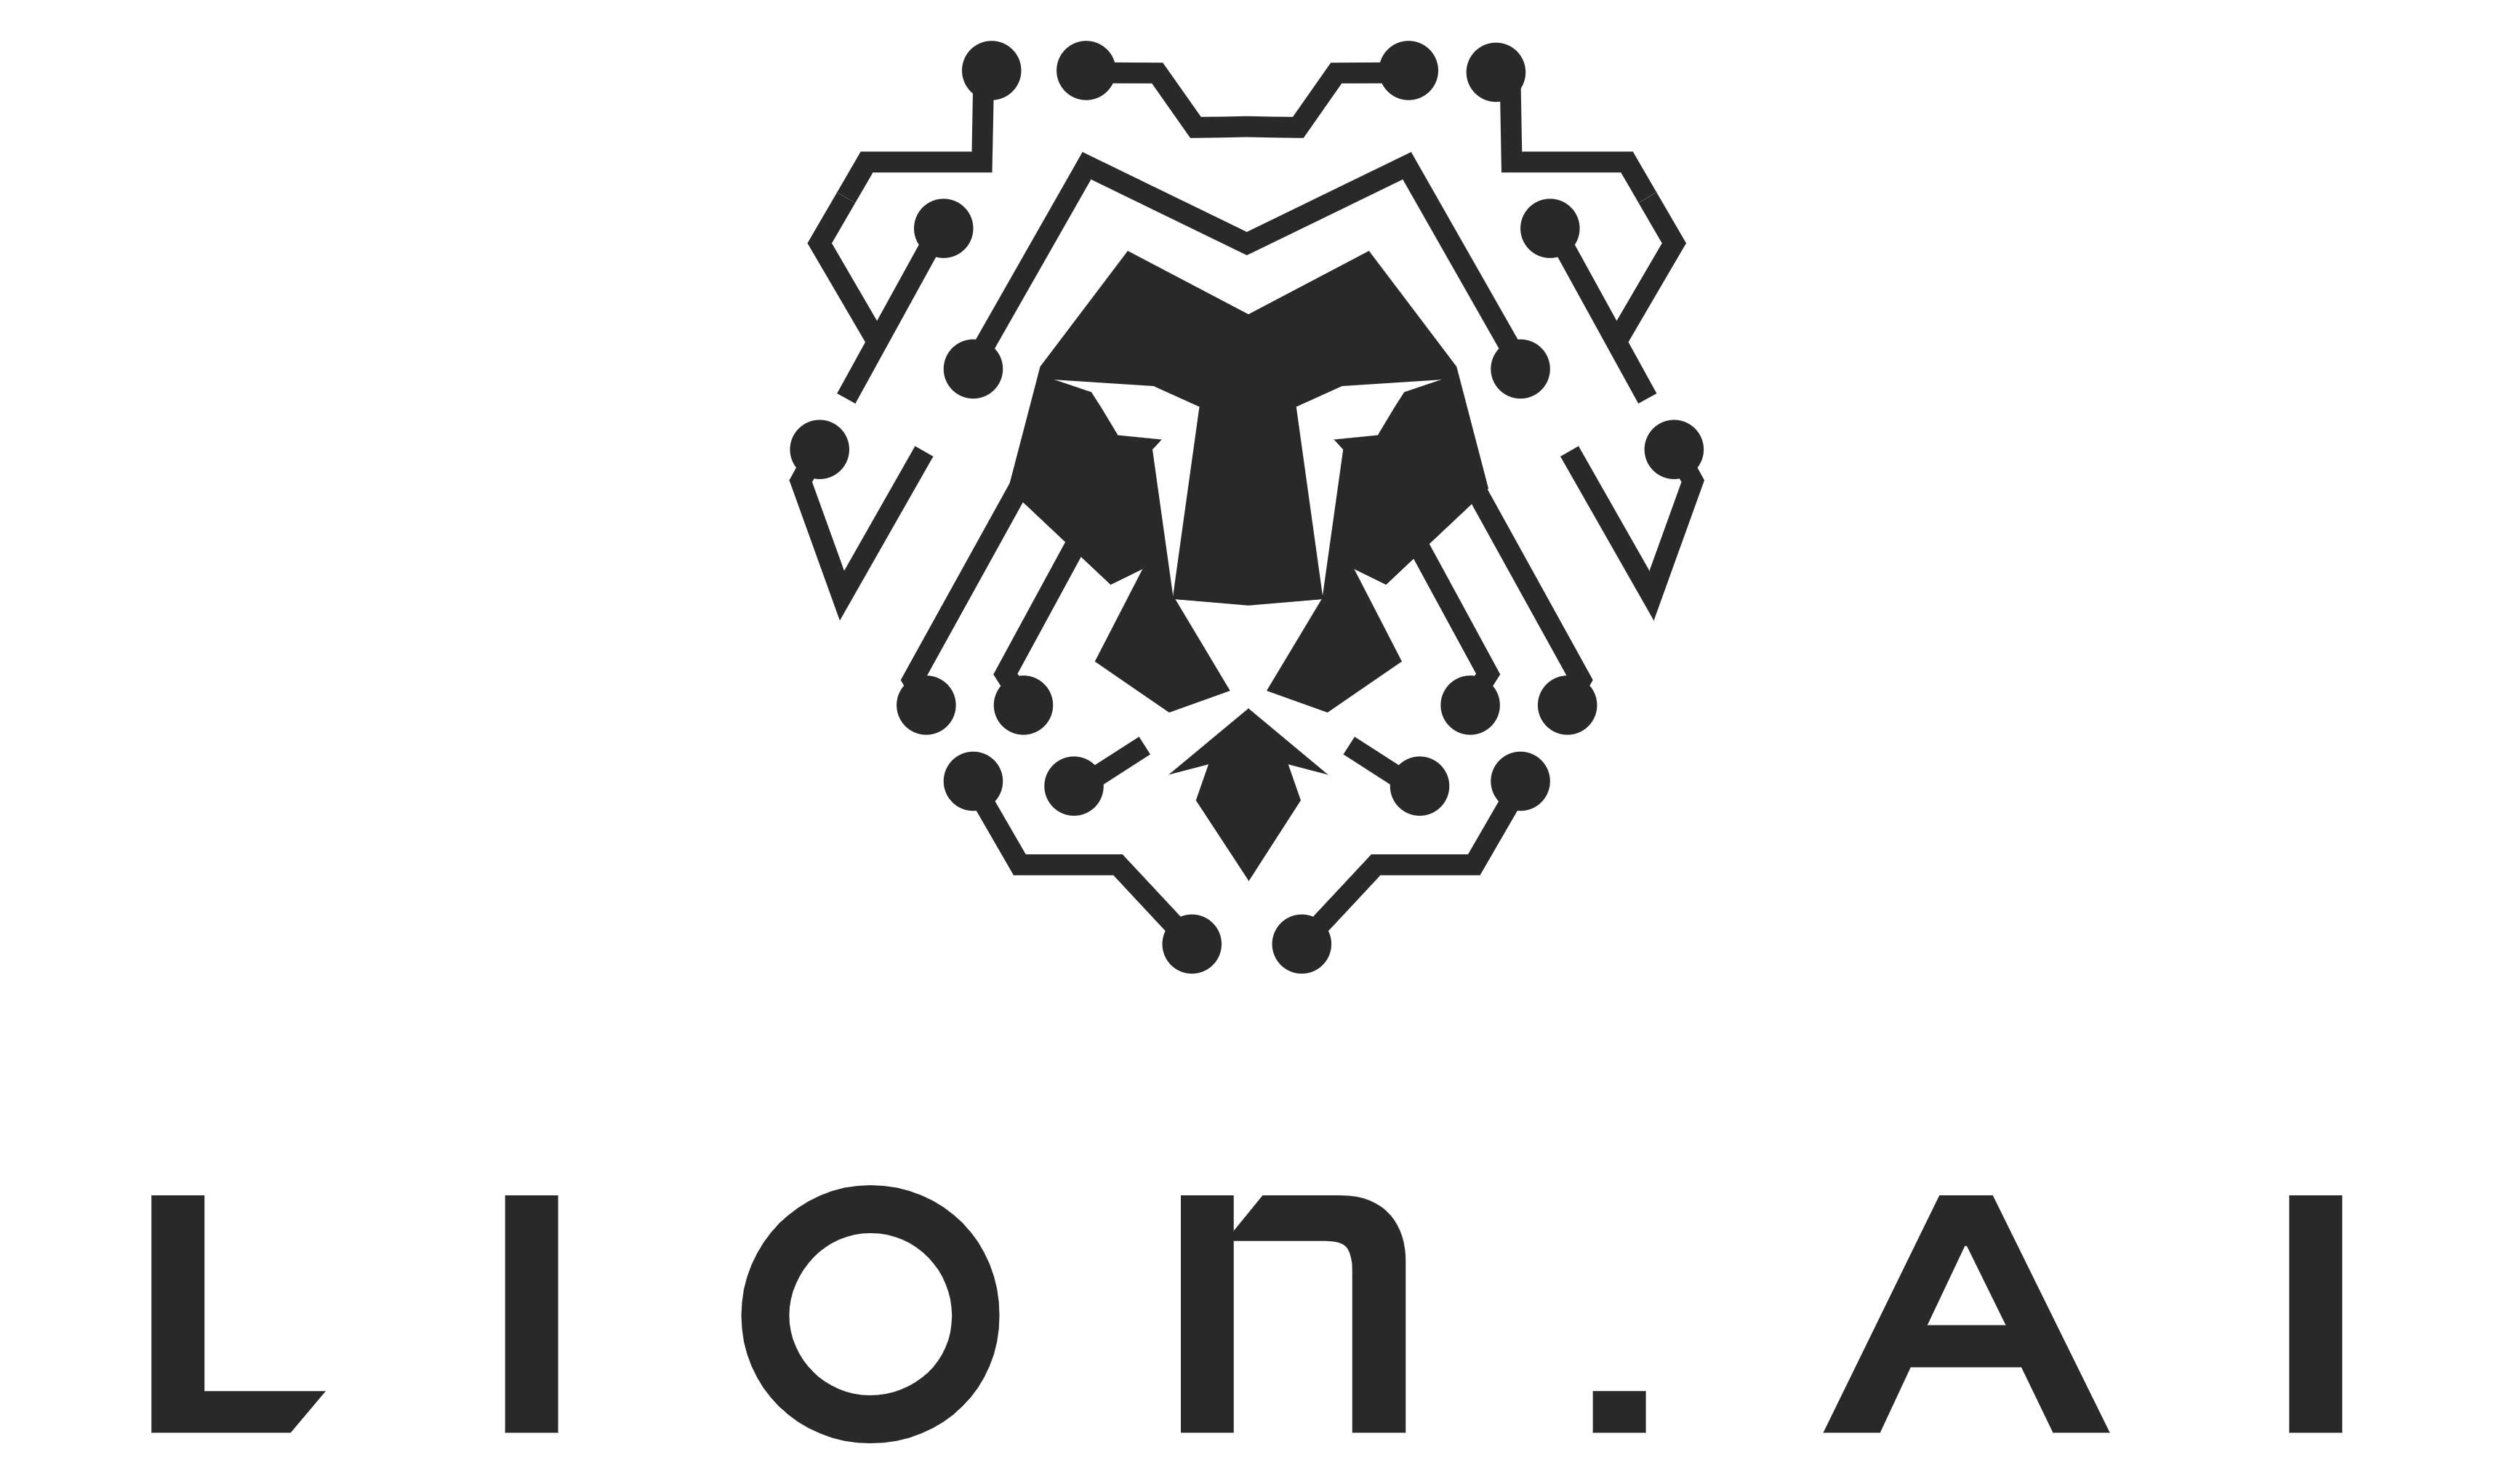
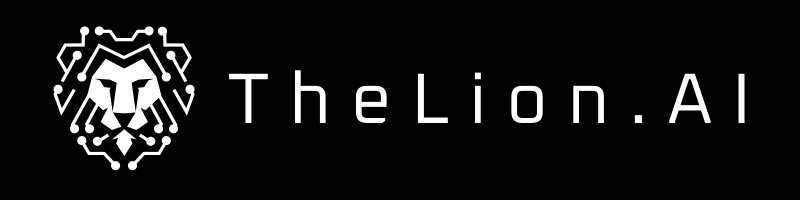

Welcome to the next installment of our Deep Learning Fundamentals laboratory series, presented by [TheLion.AI](https://www.thelion.ai/) — an interdisciplinary research group specializing in AI-based healthcare solutions. This comprehensive program is designed to equip you with practical skills in implementing deep learning models across various domains, with a special emphasis on natural language processing and computer vision. We like to make our software and teaching materials as accessible as possible. If you like what we do, consider supporting us at [https://buymeacoffee.com/thelionai](https://buymeacoffee.com/thelionai).

The course follows a progressive learning path, starting with foundational concepts and gradually building up to advanced techniques. Each lab session includes a brief overview of key concepts and hands-on coding exercises.

**New notebooks will be added weekly!**

### Syllabus
1. [Introduction to sci-kit learn](https://www.kaggle.com/code/basia25/introduction-to-scikit-learn/)
2. [Introduction to linear algebra in PyTorch](https://www.kaggle.com/code/basia25/introduction-to-linear-algebra-in-pytorch/)
3. [Neural network from scratch](https://www.kaggle.com/code/basia25/neural-network-from-scratch/)
4. [Neural network in pure PyTorch](https://www.kaggle.com/code/basia25/neural-network-in-pure-pytorch/)
5. [Neural network in PyTorch Lightning](https://www.kaggle.com/code/basia25/intro-to-pytorch-lightning)
6. [Regularization methods](https://www.kaggle.com/code/basia25/introduction-to-regularization/)
7. [Convolutional neural networks](https://www.kaggle.com/code/basia25/introduction-to-convolutional-neural-networks/)
8. [State-of-the-art CNNs](https://www.kaggle.com/code/basia25/introduction-to-state-of-the-art-cnns/)
9. Image segmentation
10. NLP fundamentals
11. HuggingFace
12. Sentence transformers
13. Explainable AI
14. Image transformer and AI in Healthcare
15. Running experiments in ClearML
16. Creating smart configuration files with Hydra

# Introduction

In this exercise, we'll explore the fundamentals of neural networks and PyTorch by implementing a simple feed-forward neural network with two layers. We'll cover tensor operations, gradient calculation, and the training process using backpropagation. This exercise will help you understand how neural networks process data and learn from it.

### Key Concepts
**Tensors**: The fundamental data structure in PyTorch, similar to NumPy arrays but with GPU acceleration capabilities.

**Computational Graphs**: PyTorch automatically tracks operations on tensors to build a computational graph, enabling automatic differentiation.

**Gradient Calculation**: Using the .backward() method to compute gradients for backpropagation.

**Feed-Forward**: The process of passing input data through the network to produce an output.

**Backpropagation**: The algorithm used to calculate gradients by propagating errors backward through the network.

**Training Loop**: The iterative process of forward pass, loss calculation, backward pass, and weight updates.

## Computational graphs

The main reason for using tensors in deep learning is that they allow us to automatically calculate the derivatives/gradients of a function (derivative for a scalar, gradient for multiple variables).

This allows us to calculate the derivative after the weights of the neural network.

By performing operations on tensors, we create a **computational graph**. This graph illustrates how to get the result from the input values.

PyTorch works on the principle of **define-by-run**, which means that the computational graph is created automatically when we perform calculations.



In [ ]:
import torch

### Gradient of the tensor

By default tensors do not track gradients. Whether a gradient is calculated can be checked using the `.requires_grad` parameter.

In [ ]:
x = torch.Tensor(2,3,4)

In [ ]:
x.requires_grad

We can enable gradient tracking.

In [ ]:
x.requires_grad = True

In [ ]:
x.requires_grad

### An example of a calculation graph

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)

In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print(y)

We see that the tensor `y` “remembers” the operation that was used to obtain it and stores its gradient functions in the `grad_fn` parameter. If we set `requires_grad= True` on the input data, then all tensors obtained from it will have gradient functions.

In [ ]:
y.grad_fn

## Calculating gradients

Liczenie gradientów odbywa się za pomocą funkcji `.backward()` zastosowanej do danych wyjściowych.
Funkacja ta liczy propagacje wsteczną (backpropagation) po całym grafie licząc gradienty od końca grafu do początku
Calculating gradients is done with the `.backward()` function applied to the output.
This function calculating backpropagation across the entire graph by calculating gradients from the end of the graph to the beginning of the graph.

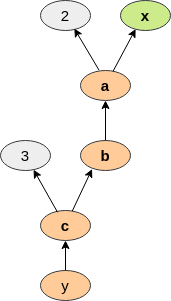

In [ ]:
y.backward()

We can use the `.grad` attribute to get the values of the gradients after counting them.

In [ ]:
x.grad

## Using a GPU

A function `torch.coda.is_available()` checks if a GPU is available.

In [ ]:
torch.cuda.is_available()

### Transferring tensors to the GPU

By default, all created tensors are stored on the CPU and not on the graphics card.

In [ ]:
x = torch.Tensor(2,3)

In [ ]:
x.device

To transfer tensors from cpu to gpu and vice versa we use the function `.to()`.

CPU

In [ ]:
torch.device("cpu")

GPU

In [ ]:
torch.device("cuda")

Transferring to GPU

In [ ]:
x.to(torch.device("cuda"))

Dynamically check if a graphics card is available, if not then CPU usage:

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
device

In [ ]:
x = x.to(device)

## Conversion from tensors to NumPy

In [ ]:
x =  torch.Tensor(2,3)

In [ ]:
x.numpy()

In order to convert a tensor that is GPU, we must first transfer it to the CPU.

In [ ]:
device = 'cuda'
x = torch.Tensor(2,3).to(device)

In [ ]:
x.numpy()

In [ ]:
x.cpu().numpy()

To convert a tensor that requires gradients we must first detach it from the computational graph using the `.detach()` function.

In [ ]:
x = torch.Tensor(2,3)

In [ ]:
x.requires_grad =  True

In [ ]:
x.numpy()

In [ ]:
x.detach().numpy()

# Exercises

## 1. Implement the feed forward algorithm
Implement the feed forward algorithm for a network with two layers
* the input to the network has a size of 784
* first layer should have 100 neurons
* second (output) layer should have 10 neurons

Batch size is 64 (but this does not affect the size of the weights)

In [ ]:
dimensions = [784,100,10]
N_batch = 64

Initialisation of random input and output data

In [ ]:
X = torch.randn(dimensions[0], N_batch)
y = torch.randn(dimensions[-1], N_batch)

### 1.1 Initialise weights and biases
Initialise the weights for the layers according to the natural distribution using the `torch.randn()` function. Note what the weights of each layer should be based on the input and output dimensions.
Inintialize biases with `torch.zeros()` function.

Remember to pass the `requires_grad = True` parameter to the variables when initialising, we will need the gradients to update the weights.

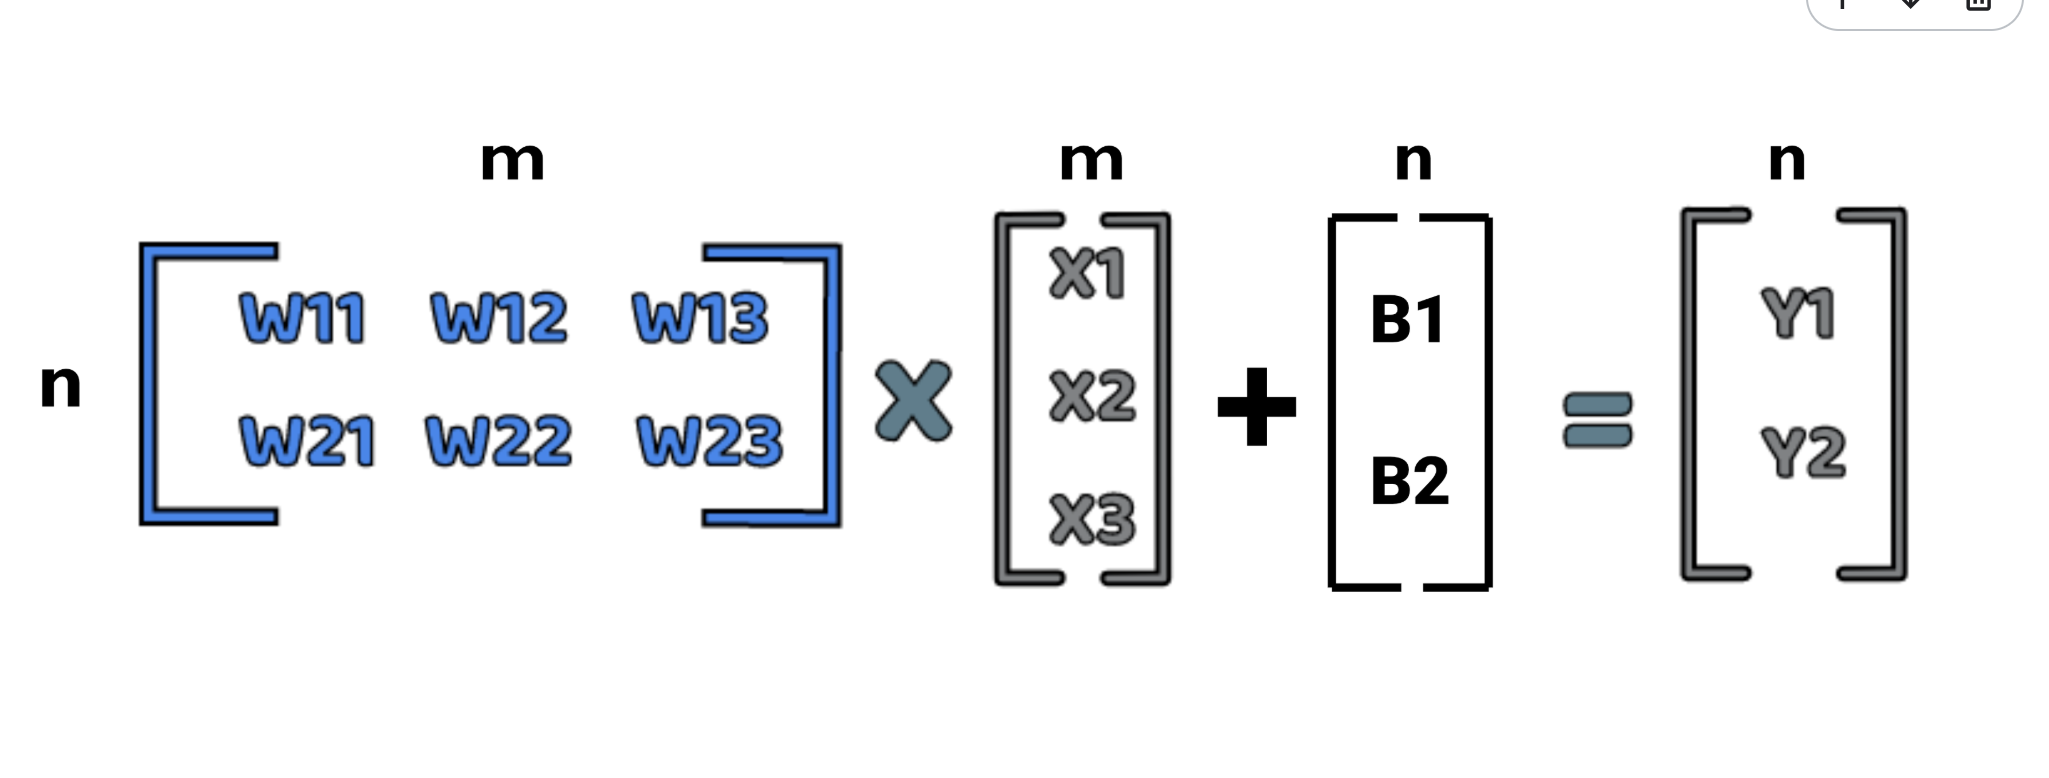

In [ ]:
W1 = _
W2 = _
b1 = _
b2 = _


### 1.2 Implement the feed forward algorithm
Implement the feed forward algorithm for both layers using matrix multiplication (`torch.mm()`), take relu (`torch.relu()`) as the activation function.

Output n = activation function (Weights n-1 x Output n-1)

In [ ]:
Z1 = _ # Matrix multiplication
A1 = _ # Activation function
Z2 = _ # Matrix multiplication
A2 = _ # Activation function

In [ ]:
A2.shape

## 2. Implement backpropagation


### Calculate the error functions
Use Mean Square Error (MSE) as the error function.
$$
loss = (y - \hat{y})^2
$$

Remember that the result of the error function should be a scalar - use the `.mean()` function on the tensor to average the results for all predictions

In [ ]:
loss = _

## Calculate gradients
Calculate the gradients for the error function

In [ ]:
# TODO

### Update the values of the weights based on the polar gradients.
Use learning rate of 5e-6.

In [ ]:
lr = 5e-6

In [ ]:
with torch.no_grad():
      W1 -= _
      b1 -= _
      W2 -= _
      b2 -= _
      # Manually zero the gradients after updating weights
      W1.grad.zero_()
      W2.grad.zero_()
      b1.grad.zero_()
      b2.grad.zero_()

### 3. Replicate the training loops
Repeat feed-forward and backpropagation operations for 600 epochs.

In [ ]:
epochs = 600

In [ ]:
W1 = _
W2 = _
b1 = _
b2 = _

In [ ]:
for epoch in range(epochs):
    Z1 = _
    A1 = _
    Z2 = _
    A2 = _


    loss = _
    loss.backward()

    if epoch % 50 == 0:
      print(loss)

    # Update weights & biases
    with torch.no_grad():
        W1 -= _
        b1 -= _
        W2 -= _
        b2 -= _
        # Manually zero the gradients after updating weights
        W1.grad.zero_()
        W2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()